# Understanding the ISIC_2020 Data

In this step, the team will be viewing and visualising the data to get a better understanding of it. This would help the team to clean and transform the data with more ease.

In [1]:
# imports
import pandas as pd
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# image visualisation
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
# Attempt to read the file with different encodings
try:
    df = pd.read_csv("data/ISIC_2020_Training_GroundTruth_v2.csv", encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv("data/ISIC_2020_Training_GroundTruth_v2.csv", encoding='latin-1')
    except UnicodeDecodeError:
        df = pd.read_csv("data/ISIC_2020_Training_GroundTruth_v2.csv", encoding='cp1252')

# Print data types of variables
print('Data Types')
print(df.info())

# Display summary statistics
print('\nSummary Statistics')
print(df.describe())

# Check for null values
print('\nCheck for Null')
print(df.isna().any())

# View data frames
df


Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   lesion_id                      33126 non-null  object 
 3   sex                            33061 non-null  object 
 4   age_approx                     33058 non-null  float64
 5   anatom_site_general_challenge  32599 non-null  object 
 6   diagnosis                      33126 non-null  object 
 7   benign_malignant               33126 non-null  object 
 8   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 2.3+ MB
None

Summary Statistics
         age_approx        target
count  33058.000000  33126.000000
mean      48.870016      0.017630
std       14.380360      0.13160

,image_name,patient_id,lesion_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,IL_7972535,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,IL_4649854,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,IL_9087444,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,IL_4255399,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,IL_6898037,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,IL_2076932,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,IL_6891604,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,IL_6364820,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,IL_6048457,male,50.0,lower extremity,unknown,benign,0


## Data Cleaning

In this step, the team would perform the following data cleaning techniques:
1. Removing the benign_malignant column, as it contains the same data as the target variable
2. Removing unknown diagnosis, as this data would not be helping for identifying the different types of skin lesions
3. Encoding categorical data for ease of running machine learning algorithms later
4. Removing rows with missing data

A new CSV with cleaned data can then be saved.

In [3]:
#drop "benign_malignant" column. 0 in target column means benign, 1 means malignant
df = df.drop(columns=['benign_malignant'])

# drop unknown diagnosis
filtered_df = df[df['diagnosis'] != 'unknown']

filtered_df

,image_name,patient_id,lesion_id,sex,age_approx,anatom_site_general_challenge,diagnosis,target
2,ISIC_0052212,IP_2842074,IL_9087444,female,50.0,lower extremity,nevus,0
12,ISIC_0076995,IP_2235340,IL_7147389,female,55.0,torso,nevus,0
26,ISIC_0084086,IP_4023055,IL_9753248,male,60.0,lower extremity,nevus,0
27,ISIC_0084270,IP_2961528,IL_3011969,male,40.0,lower extremity,nevus,0
28,ISIC_0084395,IP_0175539,IL_8767924,female,45.0,torso,nevus,0
...,...,...,...,...,...,...,...,...
33108,ISIC_9995691,IP_2358028,IL_9665629,male,50.0,upper extremity,nevus,0
33113,ISIC_9997614,IP_1705144,IL_5910182,female,50.0,upper extremity,nevus,0
33117,ISIC_9998682,IP_2516168,IL_1802809,male,60.0,head/neck,melanoma,1
33118,ISIC_9998937,IP_3091321,IL_5611581,male,40.0,head/neck,nevus,0


In [4]:
# Remove rows with missing data
df_cleaned = filtered_df.dropna()

# encode categorical data - sex, localisation and diagnosis
label_encoder_sex = LabelEncoder()
label_encoder_anatom = LabelEncoder()
label_encoder_diagnosis = LabelEncoder()

df_cleaned['sex'] = label_encoder_sex.fit_transform(df_cleaned['sex'])
df_cleaned['anatom_site_general_challenge'] = label_encoder_anatom.fit_transform(df_cleaned['anatom_site_general_challenge'])
df_cleaned['diagnosis'] = label_encoder_diagnosis.fit_transform(df_cleaned['diagnosis'])

df_cleaned

,image_name,patient_id,lesion_id,sex,age_approx,anatom_site_general_challenge,diagnosis,target
2,ISIC_0052212,IP_2842074,IL_9087444,0,50.0,1,5,0
12,ISIC_0076995,IP_2235340,IL_7147389,0,55.0,4,5,0
26,ISIC_0084086,IP_4023055,IL_9753248,1,60.0,1,5,0
27,ISIC_0084270,IP_2961528,IL_3011969,1,40.0,1,5,0
28,ISIC_0084395,IP_0175539,IL_8767924,0,45.0,4,5,0
...,...,...,...,...,...,...,...,...
33108,ISIC_9995691,IP_2358028,IL_9665629,1,50.0,5,5,0
33113,ISIC_9997614,IP_1705144,IL_5910182,0,50.0,5,5,0
33117,ISIC_9998682,IP_2516168,IL_1802809,1,60.0,0,4,1
33118,ISIC_9998937,IP_3091321,IL_5611581,1,40.0,0,5,0


In [15]:
#save df to csv
df_cleaned.to_csv('data/ISIC_2020_Training_GroundTruth_v2_cleaned.csv', index=False)

# Data Visualisation for Better Understanding

## Univariate Analysis - Exploration of Variables one by one    
-Visualisation of Categorical variables - understand the distribution of each variable.

-Visualisation of Continuous variables - understand the central tendency and spread of the variable.

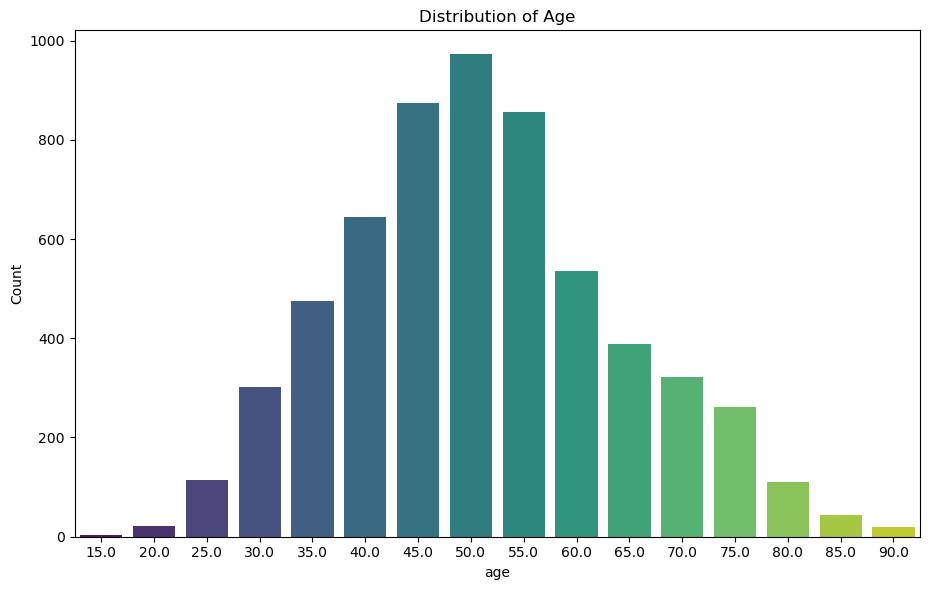

In [6]:
# Distribution of Age
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=df_cleaned['age_approx'], palette='viridis')
plt.title('Distribution of Age')
plt.xlabel('age')
plt.ylabel('Count')

# Add some space between subplots
plt.tight_layout()

plt.show()

<div style="background-color:#ccffe6; padding: 0.1em 1em 1em 1em">
    <h5>Analysis:</h5>
Distribution of age is quite equal, only slightly right-skewed, hence indicating that skin lesions occur more frequently in individuals aged 50 and lower.
</div>

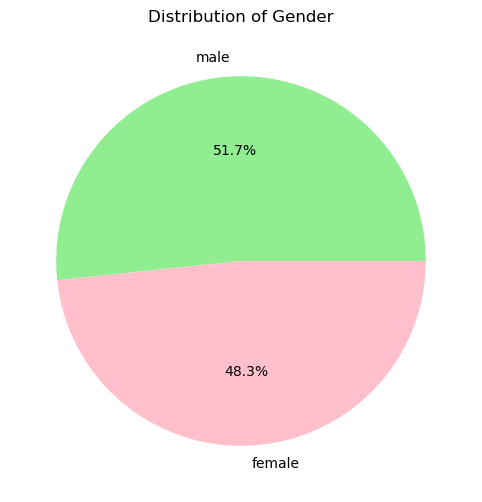

In [7]:
# Pie Chart of Gender Distribution
plt.figure(figsize=(8, 6))
gender_counts = df['sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'pink'])
plt.title('Distribution of Gender')
plt.show()

<div style="background-color:#ccffe6; padding: 0.1em 1em 1em 1em">
    <h5>Analysis:</h5>
Larger portion of males with skin lesions than females. However, more analysis can be done to better break down each gender's type of skin lesion occurrence, skin cancer occurrence, and other demographical factors.
</div>

## Multivariate Analysis - Exploration of relationship between two or more variables

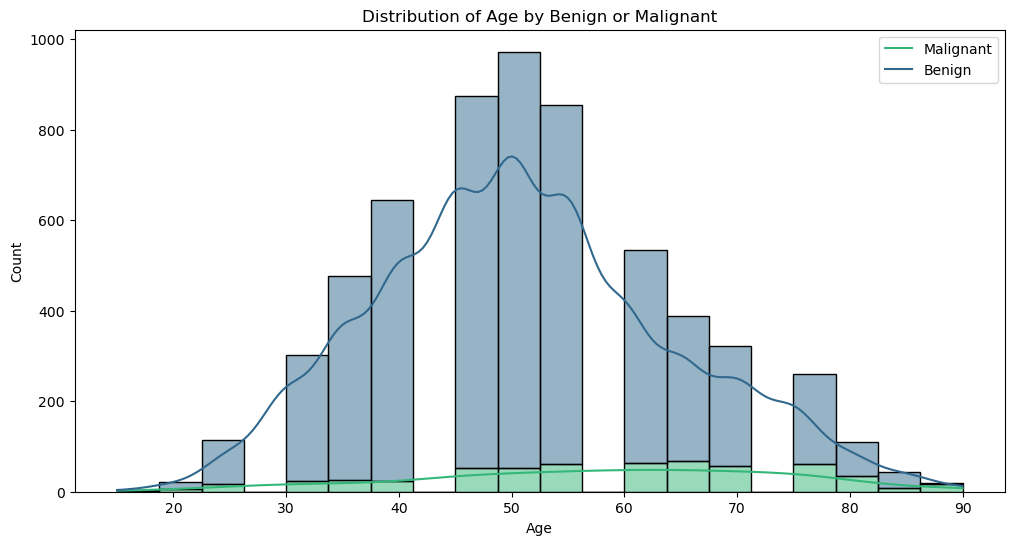

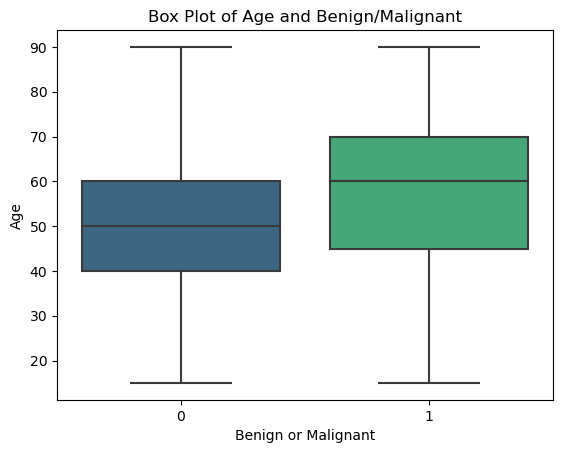

In [8]:
# Distribution of Age by Benign or Malignant
plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='age_approx', hue='target', multiple='stack', bins=20, kde=True, palette='viridis')
plt.title('Distribution of Age by Benign or Malignant')
plt.xlabel('Age')
plt.ylabel('Count')

plt.legend(labels=['Malignant', 'Benign'])

plt.show()

# Boxplot of Age by Benign or Malignant
sns.boxplot(x='target', y='age_approx', data=df_cleaned, palette='viridis')
plt.title('Box Plot of Age and Benign/Malignant')
plt.xlabel('Benign or Malignant')
plt.ylabel('Age')
plt.show()

<div style="background-color:#ccffe6; padding: 0.1em 1em 1em 1em">
    <h5>Analysis:</h5>
Malignant cases of skin lesions occur slightly more frequently in individuals aged 45 to 80. Although skin lesions occur slightly more frequently in younger individuals, malignant skin lesions occur more often in older individuals.
</div>

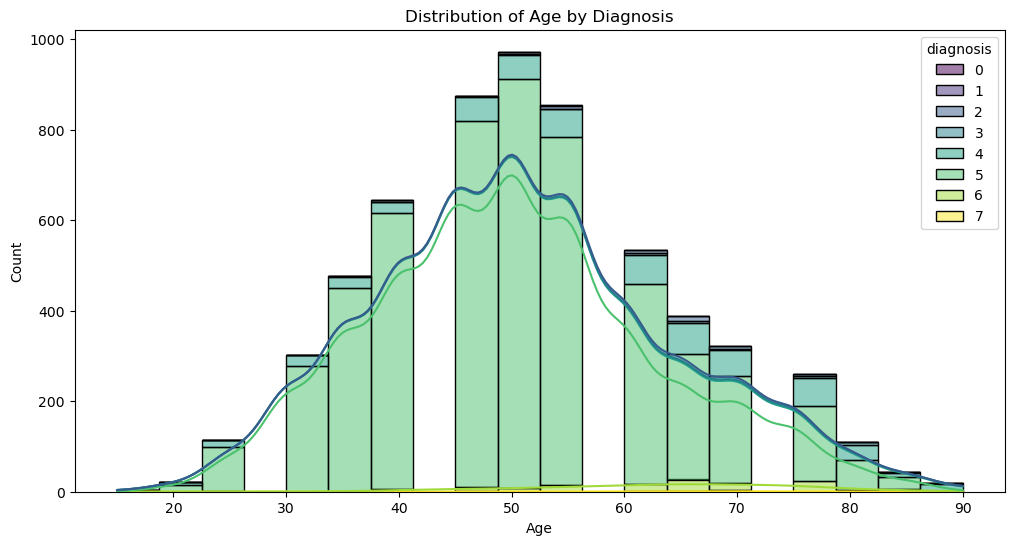

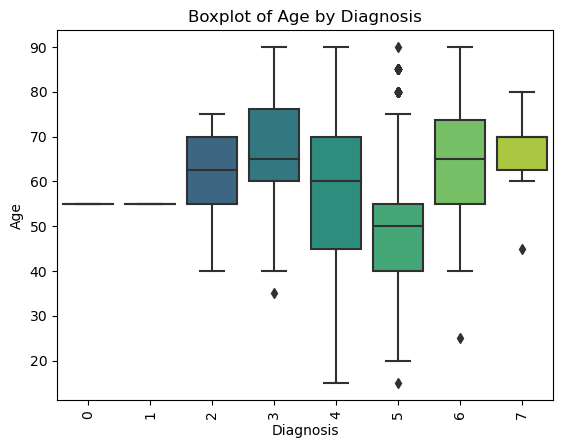

In [9]:
# Distribution of Age by Diagnosis
plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='age_approx', hue='diagnosis', multiple='stack', bins=20, kde=True, palette='viridis')
plt.title('Distribution of Age by Diagnosis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Boxplot of Age by Diagnosis
sns.boxplot(x='diagnosis', y='age_approx', data=df_cleaned, palette='viridis')
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.title('Boxplot of Age by Diagnosis')
plt.show()

<div style="background-color:#ccffe6; padding: 0.1em 1em 1em 1em">
    <h5>Analysis:</h5>
The majority of skin lesions that occur is Nevus (Category 5). It also seems that Solar Lentigo (Category 7) occurs slightly more frequently in individuals aged 60-70.
</div>

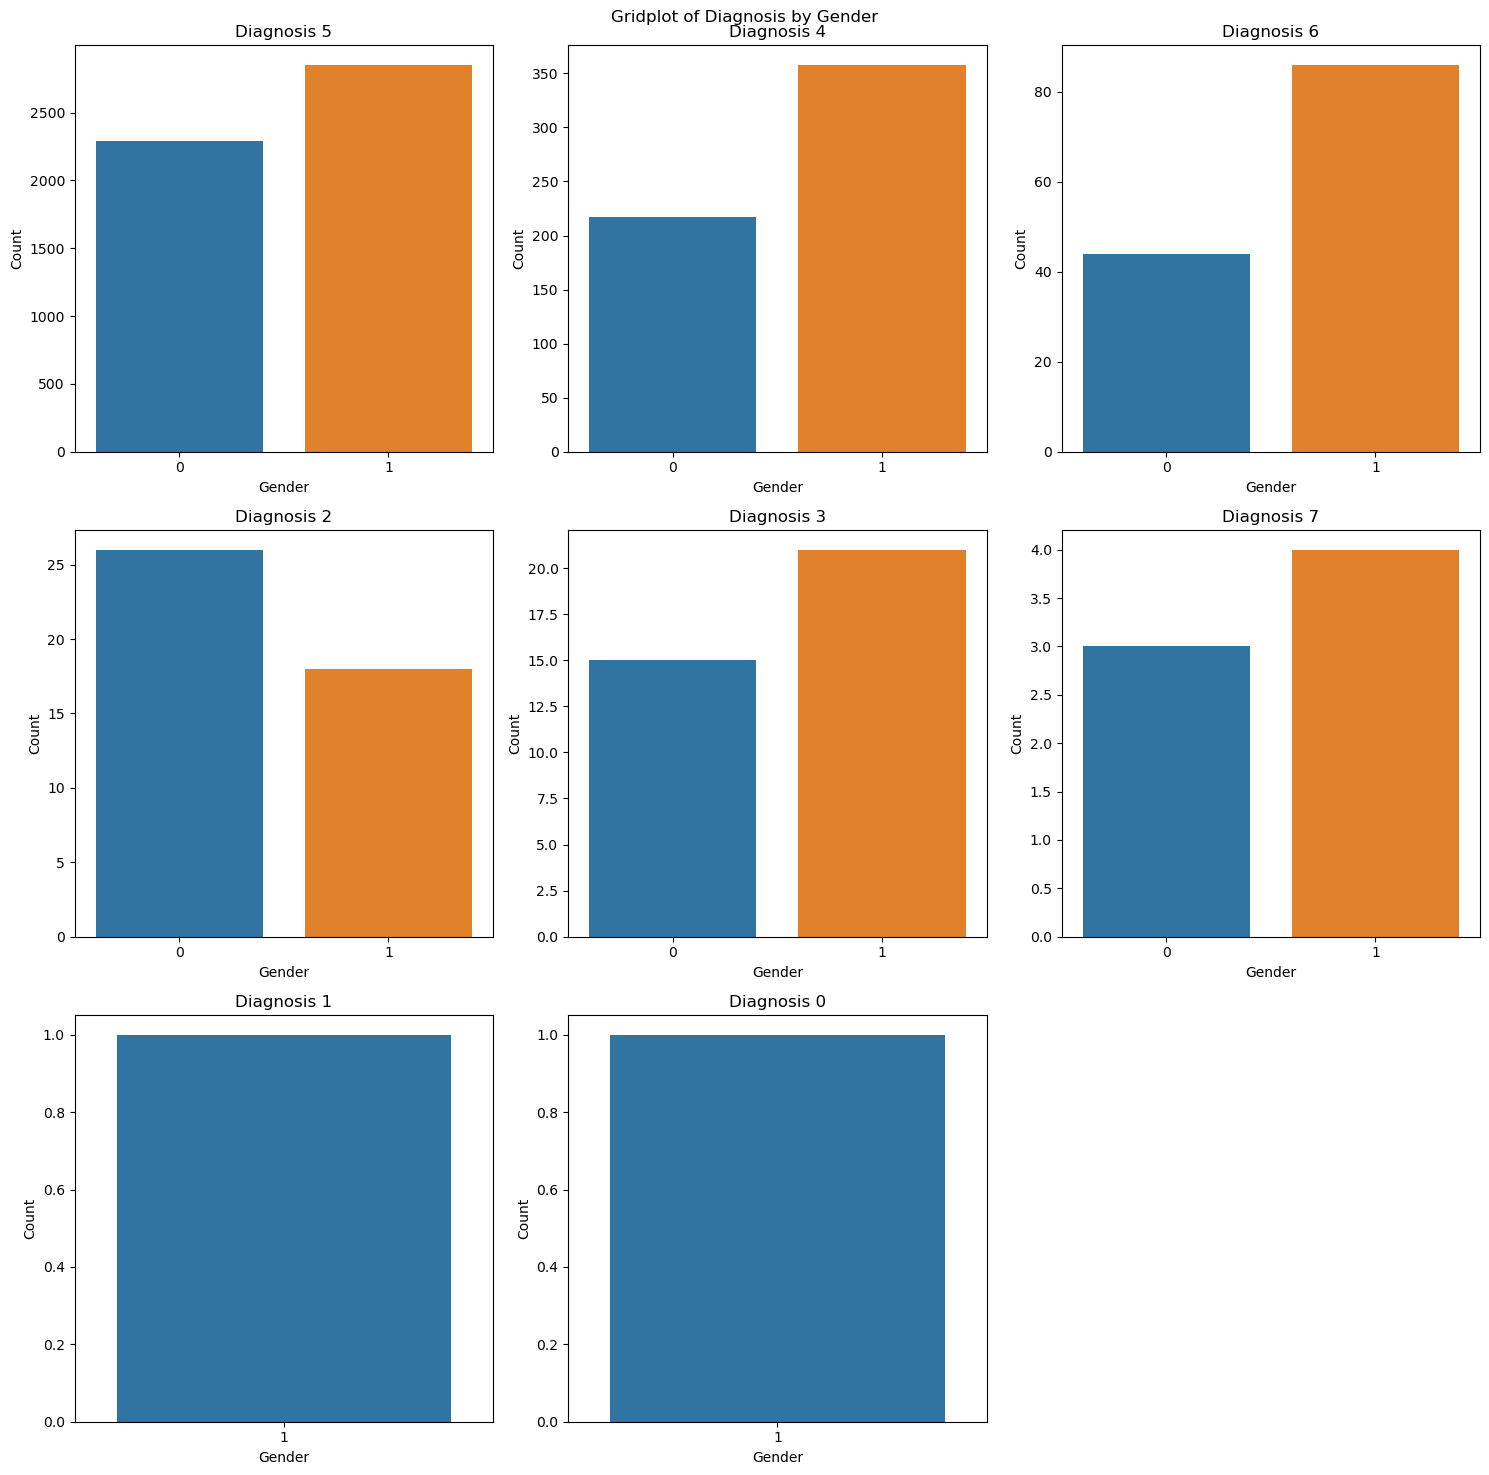

In [10]:
# Distribution of Diagnosis by Gender, 1 diagnosis per plot

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Get unique values in the 'diagnosis' column
unique_diagnosis = df_cleaned['diagnosis'].unique()

# Loop through each unique diagnosis value and plot a countplot
for i, diagnosis_value in enumerate(unique_diagnosis):
    sns.countplot(x='sex', data=df_cleaned[df_cleaned['diagnosis'] == diagnosis_value], ax=axes[i])
    axes[i].set_title(f'Diagnosis {diagnosis_value}')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel('Count')

# Hide the unused subplots
for j in range(len(unique_diagnosis), len(axes)):
    axes[j].axis('off')

plt.suptitle('Gridplot of Diagnosis by Gender')
plt.tight_layout()
plt.show()

<div style="background-color:#ccffe6; padding: 0.1em 1em 1em 1em">
    <h5>Analysis:</h5>
Atypical Melanocytic Proliferation (Category 0) and Cafe-Au-Lait Macule (Category 1) only occurs in males in this dataset. Aside from Lentigo NOS (Category 2), all other skin lesions occur more frequently in males than in females.
</div>

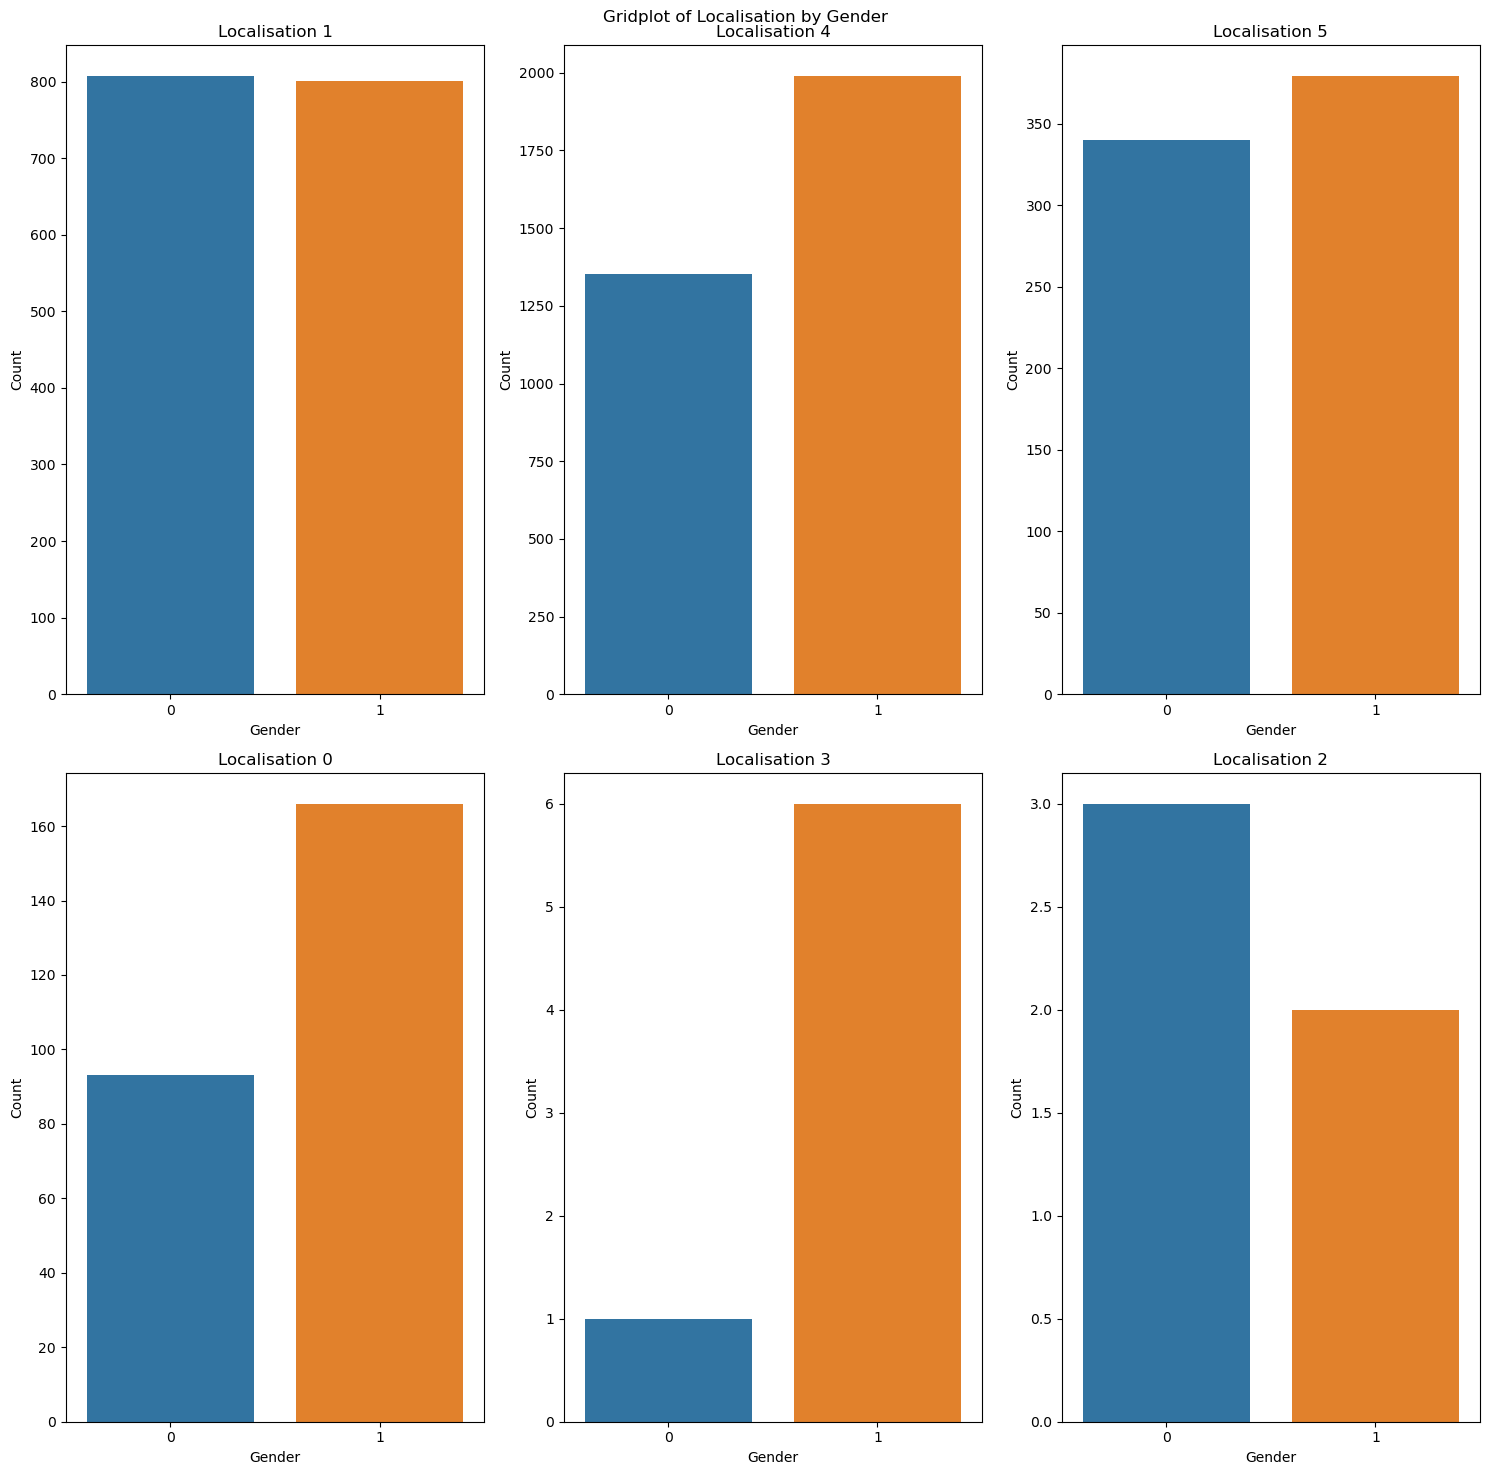

In [11]:
# Distribution of Localisation by Gender, 1 localisation per plot

fig, axes = plt.subplots(2, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Get unique values in the 'diagnosis' column
unique_localisation = df_cleaned['anatom_site_general_challenge'].unique()

# Loop through each unique diagnosis value and plot a countplot
for i, localisation_value in enumerate(unique_localisation):
    sns.countplot(x='sex', data=df_cleaned[df_cleaned['anatom_site_general_challenge'] == localisation_value], ax=axes[i])
    axes[i].set_title(f'Localisation {localisation_value}')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel('Count')

# Hide the unused subplots
for j in range(len(unique_diagnosis), len(axes)):
    axes[j].axis('off')

plt.suptitle('Gridplot of Localisation by Gender')
plt.tight_layout()
plt.show()

<div style="background-color:#ccffe6; padding: 0.1em 1em 1em 1em">
<h5>Analysis:</h5>
 In most localisation, skin lesions occur more commonly in males than in females. However, skin lesions in the lower extremity occur in almost similar frequency in both males and females. Oral and genital skin lesions occur more frequently in females.  
</div>

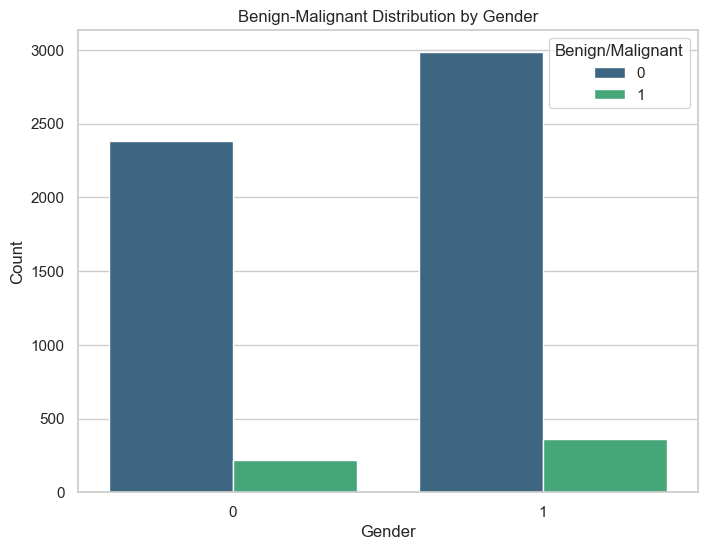

In [12]:
# Distribution of Benign or Malignant by Gender

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.countplot(x='sex', hue='target', data=df_cleaned, palette='viridis')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Benign-Malignant Distribution by Gender')

# Show the plot
plt.legend(title='Benign/Malignant', loc='upper right')
plt.show()

<div style="background-color:#ccffe6; padding: 0.1em 1em 1em 1em">
    <h5>Analysis:</h5>
        Skin lesions occur much more significantly in males, with more malignant skin lesions also occurring in males.
</div>

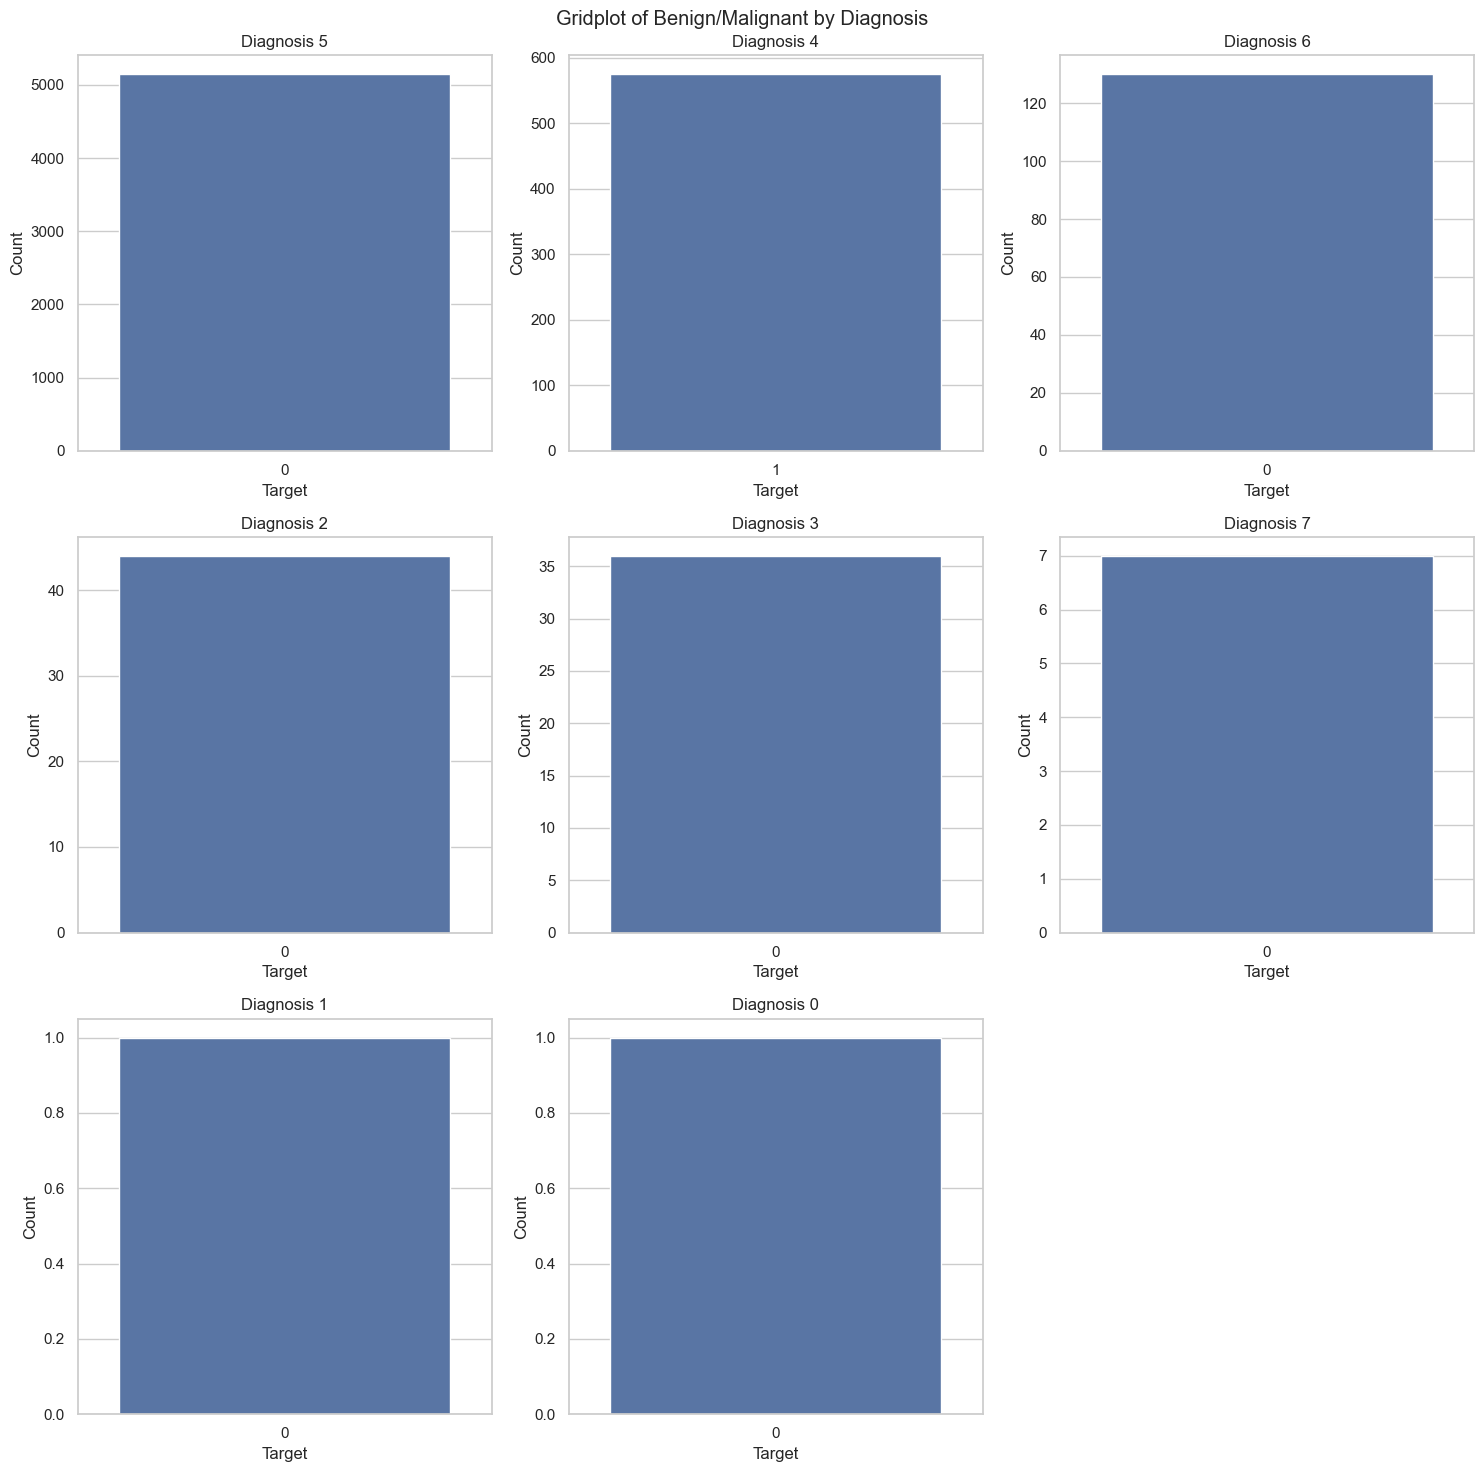

In [13]:
# Distribution of Benign or Malignant by Diagnosis, 1 diagnosis per plot

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Get unique values in the 'diagnosis' column
unique_diagnosis = df_cleaned['diagnosis'].unique()

# Loop through each unique diagnosis value and plot a countplot
for i, diagnosis_value in enumerate(unique_diagnosis):
    sns.countplot(x='target', data=df_cleaned[df_cleaned['diagnosis'] == diagnosis_value], ax=axes[i])
    axes[i].set_title(f'Diagnosis {diagnosis_value}')
    axes[i].set_xlabel('Target')
    axes[i].set_ylabel('Count')

# Hide the unused subplots
for j in range(len(unique_diagnosis), len(axes)):
    axes[j].axis('off')

plt.suptitle('Gridplot of Benign/Malignant by Diagnosis')
plt.tight_layout()
plt.show()

<div style="background-color:#ccffe6; padding: 0.1em 1em 1em 1em">
    <h5>Analysis:</h5>
It is confirmed in this gridplot that only Melanoma skin lesions are malignant.</div>

# Image Visualisation

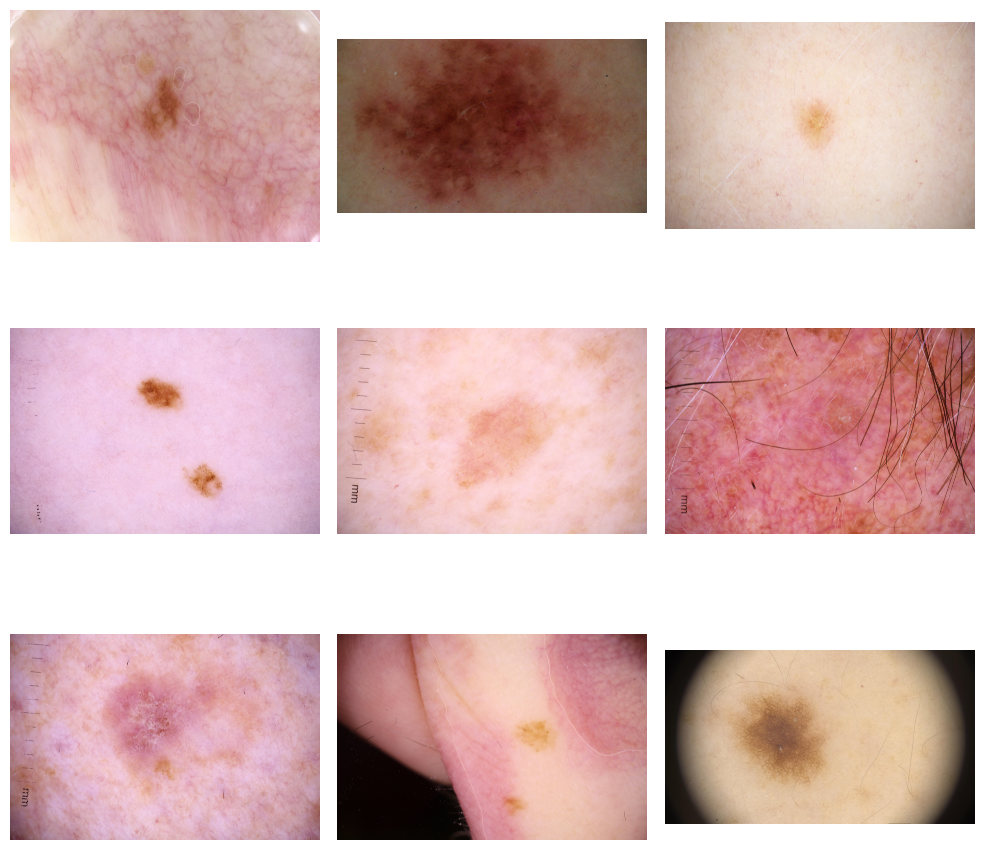

In [14]:
def display_images_in_grid(folder_path, rows, cols):
    # Get a list of image file names in the folder
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith(('.jpg', '.jpeg', '.png'))]

    # Initialize a figure with the specified number of rows and columns
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

    # Iterate over each axis and display an image
    for ax, image_file in zip(axes.ravel(), image_files):
        img = mpimg.imread(os.path.join(folder_path, image_file))
        ax.imshow(img)
        ax.axis('off')  # Turn off axis labels

    # Adjust layout to prevent overlapping of images
    plt.tight_layout()
    plt.show()

# Example usage
folder_path = 'data/ISIC_2020_Test_Input'
rows = 3
cols = 3
display_images_in_grid(folder_path, rows, cols)
